0: [0.0, 0.74, 65, -20]
0: [0.05, 0.74, 65, -20]
0: [0.1, 0.74, 65, -20]
0: [0.15000000000000002, 0.74, 65, -20]
0: [0.2, 0.74, 65, -20]
0: [0.25, 0.74, 65, -20]
0: [0.30000000000000004, 0.74, 65, -20]
0: [0.35000000000000003, 0.74, 65, -20]
0: [0.4, 0.74, 65, -20]
0: [0.45, 0.74, 65, -20]
0: [0.5, 0.74, 65, -20]
0: [0.55, 0.74, 65, -20]
0: [0.6000000000000001, 0.74, 65, -20]
0: [0.65, 0.74, 65, -20]
0: [0.7000000000000001, 0.74, 65, -20]
0: [0.75, 0.74, 65, -20]
0: [0.8, 0.74, 65, -20]
0: [0.8500000000000001, 0.74, 65, -20]
0: [0.9, 0.74, 65, -20]
0: [0.9500000000000001, 0.74, 65, -20]
1: [0.25, 0.0, 65, -20]
1: [0.25, 0.05, 65, -20]
1: [0.25, 0.1, 65, -20]
1: [0.25, 0.15000000000000002, 65, -20]
1: [0.25, 0.2, 65, -20]
1: [0.25, 0.25, 65, -20]
1: [0.25, 0.30000000000000004, 65, -20]
1: [0.25, 0.35000000000000003, 65, -20]
1: [0.25, 0.4, 65, -20]
1: [0.25, 0.45, 65, -20]
1: [0.25, 0.5, 65, -20]
1: [0.25, 0.55, 65, -20]
1: [0.25, 0.6000000000000001, 65, -20]
1: [0.25, 0.65, 65, -20]
1:

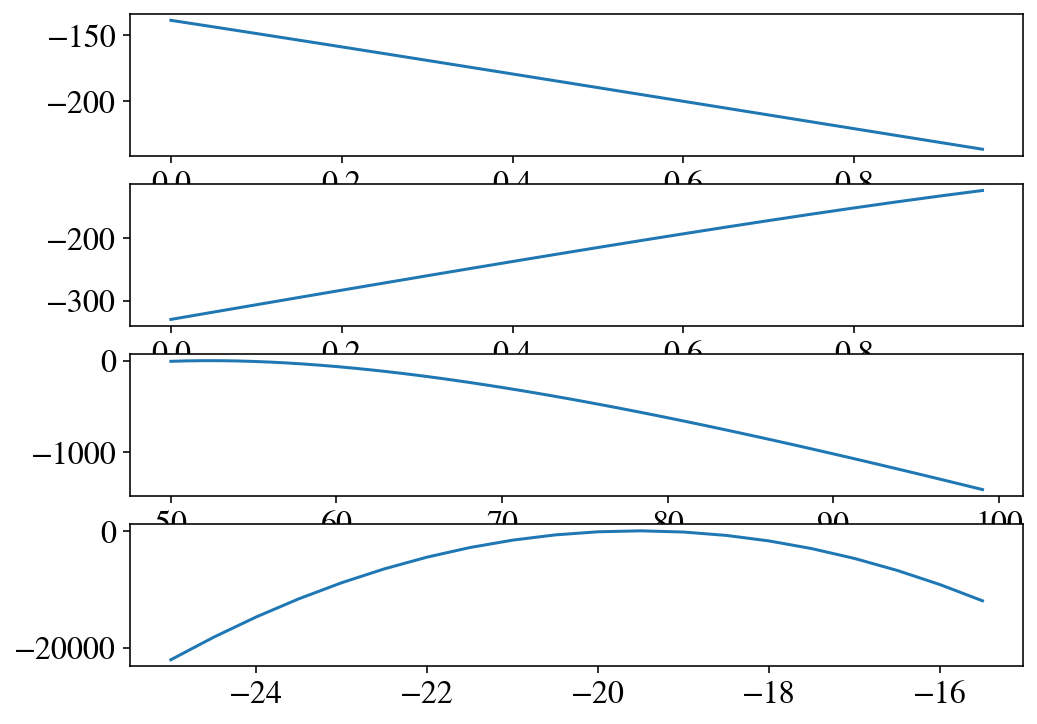

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
basedir = os.path.dirname(os.path.abspath(''))
sourcedir = os.path.join(basedir, 'source')
import sys
sys.path.insert(0, sourcedir)
from source.mcmc import MCMC

from source.mcmc_state import State

def main():
    %config InlineBackend.figure_format = 'retina'
    font = {'size'   : 16, 'family':'STIXGeneral'}
    axislabelfontsize='large'
    matplotlib.rc('font', **font)
    matplotlib.mathtext.rcParams['legend.fontsize']='medium'
    plt.rcParams["figure.figsize"] = [8.0,6.0]

    datadir = os.path.join(basedir, 'data')

    binned_data_file = os.path.join(datadir, 'lcparam_DS17f.txt')
    binned_sys_file = os.path.join(datadir, 'sys_DS17f.txt')
    # start = [np.random.uniform(0, 1),  # Omega_m
    #          np.random.uniform(0,1),  # Omega_L
    #          np.random.uniform(50,100),  # H0
    #          np.random.uniform(-25, -15)]  # M
    start = [0.25, 0.74, 65, -20]

    g_cov_test = np.diag([.01, .01, .1, .01])
    markov_chain = MCMC(initial_state=start,
                        data_file=binned_data_file,
                        systematics_file=binned_sys_file,
                        g_cov=g_cov_test)

    def map_likelihood(arg: int):
        """
        Map the argument in start parameter assuming the others
        :param arg:
        :return:
        """
        if arg == 0 or arg == 1:
            min_value = 0
            max_value = 1
            step = 0.05
        elif arg == 2:
            min_value = 50
            max_value = 100
            step = 1
        elif arg == 3:
            min_value = -25
            max_value = -15
            step = 0.5
        else:
            raise ValueError
        
        likelihood_x = np.arange(min_value, max_value, step)
        likelihood_y = []
        for i in likelihood_x:
            input = [start[0], start[1], start[2], start[3]]
            input[arg] = i
            print(f"{arg}: {input}")
            state = State(markov_chain, input)
            l = markov_chain.log_likelihood(state.tuple)
            likelihood_y.append((state.tuple, l))
            
        return likelihood_x, likelihood_y

    fig, ax = plt.subplots(4, 1)

    for i in range(4):
        x, y = map_likelihood(i)
        y = [i[1] for i in y]
        ax[i].plot(x, y)

    plt.show()

main()